In [182]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

mat_content = sio.loadmat( 'face(1).mat' )

face_data        = mat_content[ 'X' ]
face_data_labels = mat_content[ 'l' ]

print( 'Face Data {}'.format( face_data.shape ) )
print( 'Face Label {}'.format( face_data_labels.shape ) )

Face Data (2576, 520)
Face Label (1, 520)


# Create a train test split

In [183]:
train_set, test_set, train_label, test_label = train_test_split( face_data.T, face_data_labels.T, test_size = 0.2,
                                                                random_state = 42 )

train_set   = train_set.T
test_set    = test_set.T
train_label = train_label.T 
test_label  = test_label.T

print( 'Train_Set {}'.format( train_set.shape ) )
print( 'Test_Set {}'.format( test_set.shape ) )

print( 'Train_Label {}'.format( train_label.shape ) )
print( 'Test_Label {}'.format( test_label.shape ) )

Train_Set (2576, 416)
Test_Set (2576, 104)
Train_Label (1, 416)
Test_Label (1, 104)


# Work Out Mean Face

Mean Face Shape (2576,)


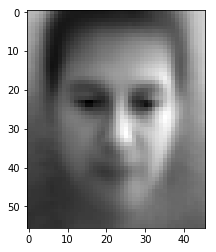

In [184]:
mean_face = np.mean( train_set, axis = 1 )

print( 'Mean Face Shape {}'.format( mean_face.shape ) )
mean_face_img = np.reshape(mean_face,(46,56))
plt.imshow( mean_face_img.T, cmap = 'gist_gray')

# High Dimension

In [185]:
phi_mat = train_set.astype( 'float64' )

for i in range( phi_mat.shape[ 1 ] ):
    phi_mat.T[ i ] = phi_mat.T[ i ] - mean_face # Subtract the mean face from each face
    
print( 'Phi_Mat Shape {}'.format( phi_mat.shape ) )

Phi_Mat Shape (2576, 416)


## Covariance Matrix

In [186]:
A = phi_mat

S = 1 / A.shape[ 1 ] * np.dot( A, A.T )
print( 'Covariance Matrix Shape {}'.format( S.shape ) )

Covariance Matrix Shape (2576, 2576)


## Eigen Values and Vectors

In [187]:
hd_eig_vals, hd_eig_vecs = np.linalg.eig( S )

### Sort Eigenvalues and Vectors into descending

In [188]:
hd_eig_pairs = [ ( np.abs( hd_eig_vals[ i ] ), hd_eig_vecs[ :, i ] ) for i in range( len( hd_eig_vals ) ) ]
hd_eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

for i in range( 10 ):
    print( hd_eig_pairs[ i ][ 0 ] )

925024.7089041442
532530.6315193954
448877.8466168924
263240.39129072166
223404.15014935445
141717.61246414387
132692.99285091058
116053.13020208251
99239.42387783811
81012.5869877316


In [189]:
M = phi_mat.shape[ 1 ] # Take (Number Of Data Faces) M largest eigenvectors
M_eig_pairs = []

for i in range( M ):
    M_eig_pairs.append( hd_eig_pairs[ i ] )
    
print( 'M Largest Eigen Pairs: {}'.format( len( M_eig_pairs ) ) )

M Largest Eigen Pairs: 416


## Eigen Faces

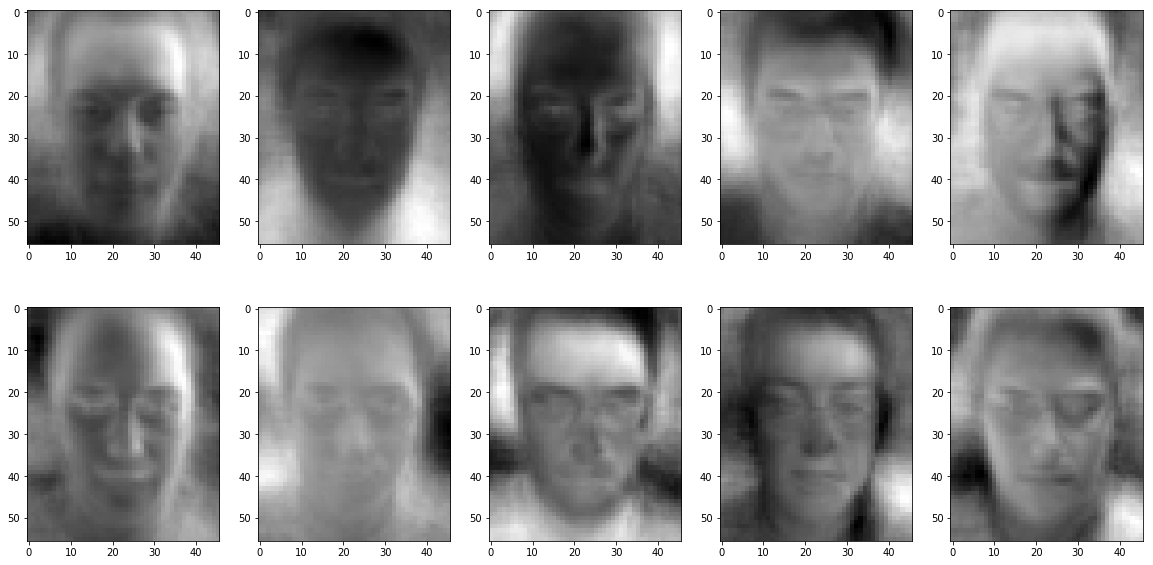

In [190]:
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_vector = M_eig_pairs[ i ][ 1 ]
    eigen_vector = eigen_vector.real # Turn into real number ( remove imaginary part )
    
    img = np.reshape( eigen_vector, ( 46, 56 ) )
    
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( img.T, cmap = 'gist_gray' )
    
plt.show()

___

# Low Dimension

In [191]:
print( 'Data - Mean Face, shape: {}'.format( A.shape ) )

Data - Mean Face, shape: (2576, 416)


## Covariance Matrix

In [192]:
S_LD = 1/A.shape[ 1 ] * np.dot( A.T, A )

print( 'Low Dimension Covariance Matrix: {}'.format( S_LD.shape ))

Low Dimension Covariance Matrix: (416, 416)


## Eigen Values and Vectors ( Low Dimension )

In [193]:
ld_eig_vals, ld_eig_vecs = np.linalg.eig( S_LD )

### Sort Eigenvalues and Vectors into descending

In [194]:
ld_eig_pairs = [ ( np.abs( ld_eig_vals[ i ] ), ld_eig_vecs[ : , i ] ) for i in range( len( ld_eig_vals ) ) ]
ld_eig_pairs.sort( key = lambda x : x[ 0 ], reverse = True )

for i in range( 10 ):
    print( ld_eig_pairs[ i ][ 0 ] )

925024.7089041438
532530.6315193927
448877.84661689255
263240.39129072113
223404.1501493553
141717.61246414448
132692.99285091017
116053.13020208282
99239.42387783817
81012.58698773173


### Create Eigen Pairs in higher dimension

In [195]:
ld_eig_pairs_higher = []

for i in ld_eig_pairs:
    eigen_vector = np.dot( A, i[ 1 ] )
    norm = np.linalg.norm( eigen_vector )
    eigen_vector = eigen_vector / norm
    
    ld_eig_pairs_higher.append( ( i[ 0 ], eigen_vector ) )

In [196]:
print( 'Low Dimension [ 0 ]: {}'.format( ld_eig_pairs_higher[ 0 ][ 1 ] ) )
print( 'High Dimension [ 0 ]: {}'.format( hd_eig_pairs[ 0 ][ 1 ] ) )

Low Dimension [ 0 ]: [-0.01326336 -0.014329   -0.0149903  ...  0.00311901  0.00294199
  0.00324892]
High Dimension [ 0 ]: [ 0.01326336+0.j  0.014329  +0.j  0.0149903 +0.j ... -0.00311901+0.j
 -0.00294199+0.j -0.00324892+0.j]


## Eigen Faces

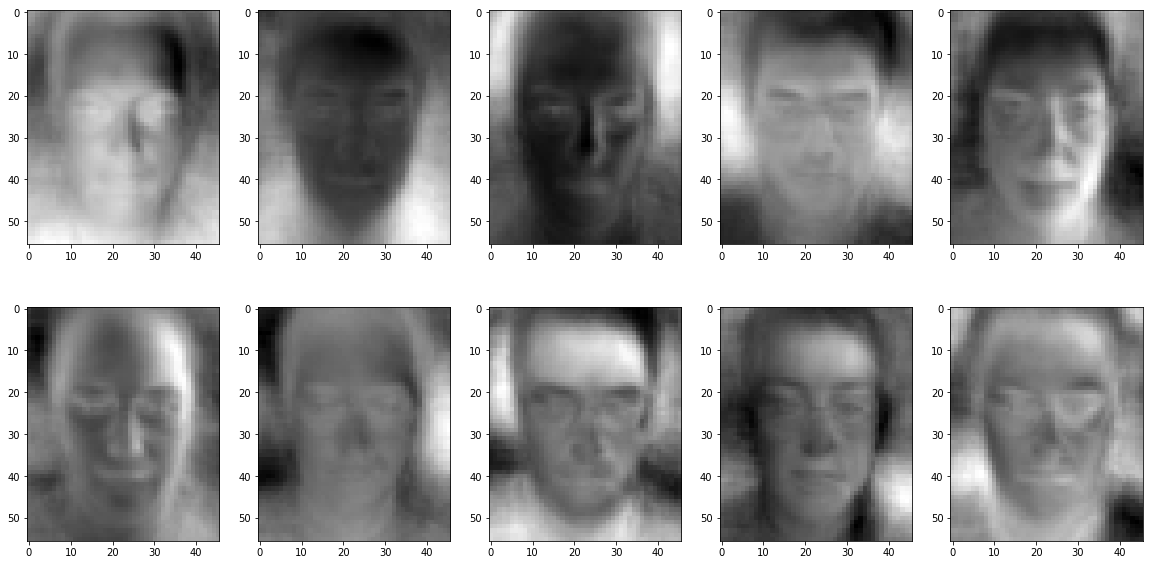

In [197]:
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_vector = ld_eig_pairs_higher[ i ][ 1 ]
    eigen_vector = eigen_vector.real
    
    img = np.reshape( eigen_vector, ( 46, 56 ) )
    
    fig.add_subplot( 2, 5, i + 1 )
    plt.imshow( img.T, cmap = 'gist_gray' )
    
plt.show()

___

# KNN

In [198]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [299]:
M_Vectors = 100

# Select eigenvector base to use
KNN_eigen_vectors = np.asarray( [ pair[ 1 ] for pair in ld_eig_pairs_higher ][ : M_Vectors ] )
# KNN_eigen_vectors = np.asarray( [ pair[ 1 ] for pair in hd_eig_pairs ][ : M_Vectors ] )

print( 'KNN_eigen_vectors shape {}'.format( KNN_eigen_vectors.shape ) )

KNN_eigen_vectors shape (100, 2576)


## Create Training Data Subspace

In [300]:
#train_set, test_set, train_label, test_label

X = np.dot( train_set.T, KNN_eigen_vectors.T ) # Project Training Data onto Subspace

print( 'Projected Training Data {}'.format( X.shape ) )

Projected Training Data (416, 100)


## Training Labels

In [301]:
Y = train_label.reshape( train_label.shape[ 1 ], ) # Create 1-D array of Training Labels
print( 'Training Labels {}'.format( Y ) )

Training Labels [44 44 21 34 23 51 33 19 50 36 33 20 34 50 46 51  9 44  8 46  2 43 19 48
  2 40  6 51 35 45 41  3 27  5 51 28 21 29 13 42  4 12 37 30 16  6 22  3
  2 25  7 23 23 10 47 29  3 25 43 38  1 12  5 41  2 49 38  1 28 43  7 12
 33 28  3 29 42  3  1 19 48 11  4 16 49 12 12 43 18 21 37 15 20 39 40 38
 49 24 47 15 41  7 24 17 19 24 40 32 20  9 11 27 15 10 16 36 42 28  9 11
 17 17 20 26  8 47 24 50 12 30 44 46 37 42 25 27 27 32 40 52  4 20 14 39
 44 31 42  6 47 25 12  9 47 27 38 16 40  4 33 20 31 15 41 15 32 30 13 39
 10 15 24 33 10 48 13 19 21 25 32 51 37 32 42 50 13 49 23 52 22 13 44 30
 46 40 41 37 31 30 39 36 12 18 32 43 35 51 38 24 52 33 17 14 20 26 24 12
 13 37 23 45 35 13 29 43 11 39 34 14 38  5 49  7 29  9 25 19 40 16  2  4
  3 18 15 42 36 23 10  6 25 39 36 40 18  5 46 41 21 29 36 26 43  1 26 47
 11 23 45 22 44 18 10 30 22  7  5  4 27 33 21 47  3 41 24 27 38 29 17 40
 45 14  7 14 13 50  1 33 49  7 31  2 16  5 38 48 43 22 41 28 46 45 34 24
 21 22 30 48 26 52 48 31 36 27 21 1

## KNN sklearn

In [302]:
KNN = KNeighborsClassifier(n_neighbors = 1)

KNN.fit( X, Y )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Project Test Data Onto Subspace

In [303]:
X_test = np.dot( test_set.T, KNN_eigen_vectors.T)

Y_test = test_label.reshape( test_label.shape[ 1 ], ) # Create 1-D array of Training Labels

## Predict

In [304]:
Y_test_predicted = KNN.predict( X_test )

Accuracy = ( np.sum( Y_test_predicted == Y_test ) / Y_test.shape[ 0 ] * 100 )

print( 'Accuracy: {} %'.format( Accuracy ) )

Accuracy: 58.65384615384615 %


# High Vs Low

* WHen we project the new test set onto the eigen subspace, the direction of the eigenvectors that make up the subspace do not matter. We still obtain the same accuracy

___

# Alternative Method

In [536]:
number_test_set = 2

all_test_set = []
all_mean_faces = []
all_higher_subspaces = []

for class_index in range( 1, 53 ):
    
    class_train_set = face_data.T[ ( class_index - 1 ) * 10 : ( class_index * 10 ) - number_test_set ] # Select first 10 - number_test_set elements
    class_test_set  = face_data.T[ ( class_index * 10 ) - number_test_set : ( class_index * 10 ) ] # Select last number_test_set elements
    
    for row in class_test_set:
        all_test_set.append( row )
        
        
    # Calculate the class mean face
    class_mean_face = np.mean( class_train_set, axis = 0 )
    
    all_mean_faces.append( class_mean_face )
    
    class_a = class_train_set.astype( 'float64' )
    
    # Subtract mean face from training data
    for i in range( class_a.shape[ 0 ] ):
        class_a[ i ] = class_a[ i ] - class_mean_face
        
    # Calculate covariance matrix
    class_s_ld = 1 / class_a.shape[ 0 ] * np.dot( class_a, class_a.T )    
    
    # Calculate eigenvalues and vectors
    class_ld_eig_vals, class_ld_eig_vecs = np.linalg.eig( class_s_ld )
    
    # Lets use all the eigenvectors since there are only 8 per class
    # Convert to higher dimension
    class_ld_eig_vecs_higher = []
    for vec in class_ld_eig_vecs:
        class_ld_eig_vecs_higher.append( np.dot( class_a.T, vec ) )
        
    class_ld_eig_vecs_higher = np.asarray( class_ld_eig_vecs_higher ) 
    
    all_higher_subspaces.append( class_ld_eig_vecs_higher )


## Calculated Test, Subspaces and Mean Faces

In [537]:
all_test_set         = np.asarray( all_test_set )
all_higher_subspaces = np.asarray( all_higher_subspaces )
all_mean_faces       = np.asarray( all_mean_faces )

print( 'All Test Set: {}'.format( all_test_set.shape ) )
print( 'All Sub Spaces: {}'.format( all_higher_subspaces.shape ) )
print( 'All Mean Faces: {}'.format( all_mean_faces.shape ) )

All Test Set: (104, 2576)
All Sub Spaces: (52, 8, 2576)
All Mean Faces: (52, 2576)


## Reconstruct a test face and calculate error

In [538]:
from scipy.spatial.distance import euclidean

def reconstruction_error( test_face, class_mean_face, class_subspace ):
    face = test_face - class_mean_face
    projected = np.dot( class_subspace, face )
    
    reconstruction = np.add( class_mean_face.T, np.dot( projected.T, class_subspace ) )
    
    error = euclidean( test_face, reconstruction )
    
    return error, reconstruction

### Test on one image on one subspace

2253688512.284864


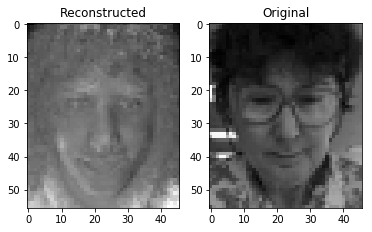

In [539]:
test_face = all_test_set[ 1 ].reshape( 2576, 1 )
test_mean_face = all_mean_faces[ 3 ].reshape( 2576, 1 )
test_subspace = all_higher_subspaces[ 3 ]

error, reconstruction = reconstruction_error( test_face, test_mean_face, test_subspace )

print( error )

test_img = np.reshape( reconstruction,(46,56))

my_fig = plt.figure()

ax1 = my_fig.add_subplot( 1, 2, 1)
ax1.set_title( 'Reconstructed' )
plt.imshow( test_img.T, cmap = 'gist_gray')

ax2 = my_fig.add_subplot( 1, 2, 2)
ax2.set_title( 'Original' )
plt.imshow( test_face.reshape( 46, 56 ).T, cmap = 'gist_gray' )

plt.show()

## All test images across all subspaces

In [540]:
import sys

all_class_guesses = []

for image in all_test_set:
# for image in all_test_set[ : 1 ]:
    
    test_image = image.reshape( 2576, 1 )
    
    min_error = sys.float_info.max # Set float to max possible, error will only get smaller ( up to 0 )
    class_guess = -1
    
    for index in range( len( all_higher_subspaces ) ):
        
        test_subspace  = all_higher_subspaces[ index ]
        test_mean_face = all_mean_faces[ index ].reshape( 2576, 1 )
        
        error, _ = reconstruction_error( test_image, test_mean_face, test_subspace )
        
        if( error < min_error ):
            min_error = error
            class_guess = index + 1
            
    all_class_guesses.append( class_guess )

In [541]:
all_class_guesses = np.asarray( all_class_guesses )

In [542]:
all_class_guesses

array([ 4,  4, 52,  7,  4,  4,  4,  4, 20, 22, 26, 26,  4,  4, 44,  4,  3,
       10,  4,  4,  4,  4,  7, 52, 52, 21, 21, 11,  1, 21,  4,  4,  4, 21,
        4,  4,  4,  4,  4,  4, 44,  4, 21, 20, 44,  4,  4,  4,  4,  4, 29,
       25, 11,  4, 30,  5, 47, 25, 47, 11,  3,  8, 11, 33, 25,  3, 22, 25,
        3,  3, 44, 25, 52, 47, 26, 26, 20, 20,  3, 37, 13, 47, 25,  3, 25,
        3,  4, 51,  8,  8, 44, 44,  7,  4,  3, 49,  3,  4, 25, 32,  4,  4,
        3,  4])

In [543]:
correct_classes = np.asarray( [ f( i ) for i in range( 52 ) for f in ( lambda x: x+1, lambda x: x+1 ) ]  )

print( correct_classes )

[ 1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11 12 12
 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23 24 24
 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 32 33 33 34 34 35 35 36 36
 37 37 38 38 39 39 40 40 41 41 42 42 43 43 44 44 45 45 46 46 47 47 48 48
 49 49 50 50 51 51 52 52]


In [544]:
np.sum( correct_classes == all_class_guesses )

2